Grade=100/100

# Introduction
The reason that we did all of these things was so that we could calibrate the Angell Hall telescope/CCD camera. The way we did all of this was by taking flats, biases, dark current flats, and linearity measurements. Flats and biases help us to find the gain and readnoise of the instrument measurements. We want a low gain and small readnoise for optimal measuring power. Performing these tasks help us to gauge the accuracy of our instruments and adjust our values for offsets before we take science data.

# Theory
Taking biases help us to measure the noise for the CCD camera, without anything in the frame. We use this in hand with the flats measurements to find gain and readnoise, whose equations are below.

$\text{Gain}=\frac{(\bar{F_1}-\bar{F_2})-(\bar{B_1}-\bar{B_2})}{\sigma^2_{F_1-F_2}-\sigma^2_{B_1-B_2}}$

$\text{Read Noise} = \frac{\text{Gain}\cdot \sigma_{B_1-B_2}}{\sqrt{2}}$

Dark current is kind of a counterintuitive thing. It gives the amount of radiation entering the telescope when there is no light actually entering the telescope. The equation for it is below.

$\text{Dark Current} =    A{T^{3/2}}/{2e^{\frac{-E_g}{2kT}}}$

Linearity is basically "breaking" the telescope. To measure it, you take longer and longer exposure times and see when it doesn't make a difference in the average pixel value any longer.

# Methods
We took the biases in complete dark. We then took the flats with the square light thing that is said to have a constant flux. The dark current was taken at different temperatures and the linearity was taken for different exposure times. We then wrote some fancy code below to plot and such but it is all very confusing.

In [3]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

n = 10
imh = 1020
imw = 1530
bias = np.empty(shape=(n,imh,imw),dtype=np.float32)
for i in range(1,10):
    a = fits.getdata('/Users/ekhammer/ccdlab/ccdlab/Spoopy.0000000'+str(i)+'.Bias.fit')
    bias[i,:,:] = a

In [4]:
flat = np.empty(shape=(n,imh,imw),dtype=np.float32)
for i in range(1,10):
    b = fits.getdata('/Users/ekhammer/ccdlab/ccdlab/Spoopy.0000000'+str(i)+'.FlatField.fit')
    flat[i,:,:] = b

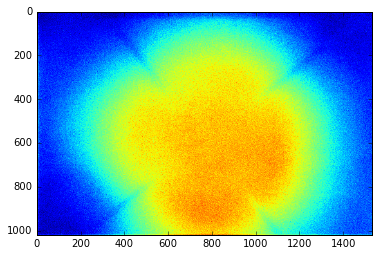

In [5]:
plt.imshow(flat[1,:,:],vmin=30000,vmax=34000)

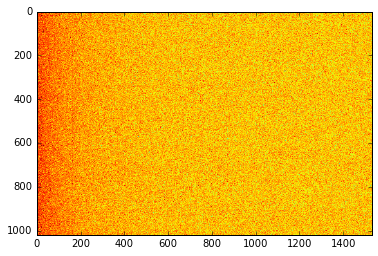

In [6]:
plt.imshow(bias[1,:,:],vmin=950,vmax=1050)

(array([  8.62080000e+05,   6.98517000e+05,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 29717. ,  31908.7,  34100.4,  36292.1,  38483.8,  40675.5,
         42867.2,  45058.9,  47250.6,  49442.3,  51634. ]),
 <a list of 10 Patch objects>)

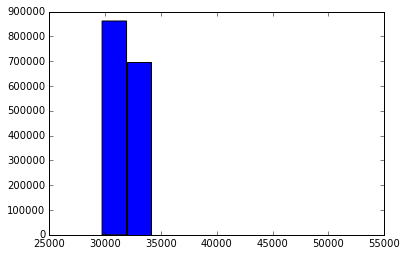

In [7]:
plt.hist(flat[1,:,:].flatten())

In [8]:
#averages
avg_bias = []
avg_flat = []

for i in range(1,10):
    avg_bias.append(np.mean(bias[i,:,:]))
    avg_flat.append(np.mean(flat[i,:,:]))

#variances
b3 = bias[1,:,:]-bias[2,:,:]
b3 = b3**2
var_bias = np.mean(b3)


f3 = flat[1,:,:]-flat[2,:,:]
f3 = f3**2
var_flat = np.mean(f3)


#gain
g = ((avg_flat[1]+avg_flat[2])-(avg_bias[1]+avg_bias[2]))/(var_flat-var_bias)
print 'gain = ',g

#readnoise
rn = g*(np.sqrt(var_bias)/np.sqrt(2))
print 'read noise = ',rn

gain =  2.735
read noise =  16.839294179


[1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 14.0, 16.0]
[5637.8778585159553, 10279.729668076381, 19538.747825195438, 28766.694571318723, 37966.794562988594, 46406.187597718825, 57491.606809560428, 59426.625856080995]


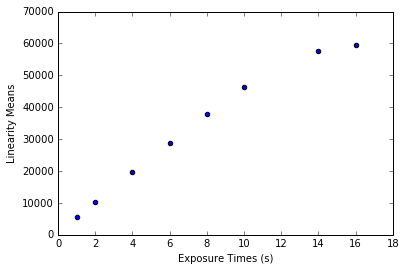

In [9]:
root = '/Users/ekhammer/ccdlab/ccdlab/Linearity/'

linearityfiles = [root + 'TeamSpoopyLin.00000001.FlatField.fit',\
                  root + 'TeamSpoopyLin.00000002.FlatField.fit',\
                  root + 'TeamSpoopyLin.00000003.FlatField.fit',\
                  root + 'TeamSpoopyLin.00000004.FlatField.fit',\
                  root + 'TeamSpoopyLin.00000005.FlatField.fit',\
                  root + 'TeamSpoopyLin.00000006.FlatField.fit',\
                  root + 'TeamSpoopyLin.00000007.FlatField.fit',\
                  root + 'TeamSpoopyLin.00000008.FlatField.fit']

exptimes = []
linmeans = []

#Gathering linearity data
for files in linearityfiles:
    lin = fits.open(files)
    lin.info
    linheader = lin[0].header
    lindata = lin[0].data
    exptimes.append(linheader['EXPTIME'])
    linmeans.append(np.mean(lindata))
    
print exptimes
print linmeans

#Plotting the linearity data
plt.figure()
plt.scatter(exptimes, linmeans)
plt.xlabel('Exposure Times (s)')
plt.ylabel('Linearity Means')
plt.show()

[ 28795686.2846272]


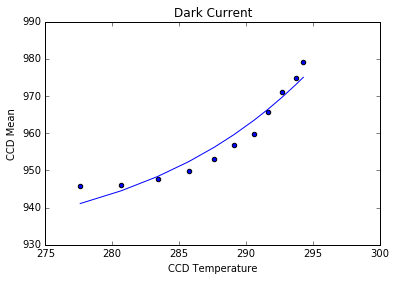

In [63]:
#Empty lists for temps and means
temps = []
means = []

root1 = '/Users/ekhammer/ccdlab/ccdlab/DarkCurrent/'

#Importing Dark Current data
filelist = [#root1 + 'TeamSpoopy.00000001.Dark.fit',\
            #root1 + 'TeamSpoopy.00000002.Dark.fit',\
            #root1 + 'TeamSpoopy.00000003.Dark.fit',\
            #root1 + 'TeamSpoopy.00000004.Dark.fit',\
            root1 + 'TeamSpoopy.00000005.Dark.fit',\
            root1 + 'TeamSpoopy.00000006.Dark.fit',\
            root1 + 'TeamSpoopy.00000007.Dark.fit',\
            root1 + 'TeamSpoopy.00000008.Dark.fit',\
            root1 + 'TeamSpoopy.00000009.Dark.fit',\
            root1 + 'TeamSpoopy.00000010.Dark.fit',\
            root1 + 'TeamSpoopy.00000011.Dark.fit',\
            root1 + 'TeamSpoopy.00000012.Dark.fit',\
            root1 + 'TeamSpoopy.00000013.Dark.fit',\
            root1 + 'TeamSpoopy.00000014.Dark.fit',\
            root1 + 'TeamSpoopy.00000015.Dark.fit']

#Creating a list of means and temperatures for the Dark Current Data
for files in filelist:
    dark = fits.open(files)
    dark.info
    darkheader = dark[0].header
    darkdata = dark[0].data
    temps.append(darkheader['CCD-TEMP'] + 273.15)
    means.append(np.mean(darkdata) - var_bias)
 
#Converting to an array
temps = np.array(temps)
means = np.array(means)
means += 3
#print temps
#print means

#Creating a plot of means vs temps and fitting a curve to it.

plt.figure()
plt.scatter(temps, means)
plt.xlabel('CCD Temperature')
plt.ylabel('CCD Mean')
plt.title('Dark Current')

#Defining the function for dark current
def func(temps, p):
    return p*temps**(3.0/2.0)*np.exp((-6443)/(temps)) + 930

#Curve fit
popt, pcov = curve_fit(func, temps, means, [1])

print popt

plt.plot(temps, func(temps, *popt))
    
plt.show()


# Conclusion
The Angell Hall telescope has very similar values to the MDM4K detector for gain and readnoise. In conclusion, I understand the importance of measuring these things on a telescope if you are going to be collecting actual real science data. It will make sure that your data is not "biased" to inconsistencies in the telescope or the noise that the telescope inherently has. I will keep this in mind if I am ever using a real telescope for real grown up astronomer things.